# Qui êtes-vous ?
<div class="alert alert-block alert-info">
Écrire ci-dessous le nom, le prénom et le numéro étudiant de chaque membre du binôme :
</div>

# TME 05X - Optimisation numérique d'une fonction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1 - Comparaison entre dichotomie, point fixe et Newton

<div class="alert alert-block alert-warning">
Dans cette première partie, nous allons comparer les vitesses de convergence des algorithmes vus en cours pour trouver les zéros d'une fonction, à savoir la dichotomie, la methode du point fixe et la méthode de Newton.
</div>

<div class="alert alert-block alert-info">
    Q1.1 - Définir la fonction <code>f1</code> telle que $$f_1(x) = 1 - x + \exp(-3x).$$
</div>

In [3]:
def f1(x):
    return (1 - x + np.exp(-3*x))

<div class="alert alert-block alert-info">
    Q1.2 - Écrire la fonction <code>dichotomie</code> qui prend en paramètre une fonction <code>f</code>, deux bornes <code>a0</code> et <code>b0</code> et une précision <code>eps</code> et qui renvoie le couple formé d'un $x^*$ tel que $f(x^*) \simeq 0$ et du nombre d'itérations effectuées.
</div>

In [4]:
def dichotomie(f, a0, b0, eps):
    compt=0
    xmin=a0
    xmax=b0
    xh=0
    while (xmax-xmin)>=eps:
        xh = (xmin + xmax) / 2.0
        if (f(xh)*f(xmin))>0:
            xmin=xh
        elif (f(xh)*f(xmax))>0:
            xmax=xh
        compt=compt+1
    return (xh, compt)

<div class="alert alert-block alert-info">
Q1.3 - Testez la fonction dichotomie pour obtenir une approximation à $10^{-15}$ près du zéro de la fonction $f_1$ en partant de l'intervalle de départ $[0, 2]$.
</div>

In [5]:
dichotomie(f1, 0, 2, 10**(-15))

(1.0436732400551056, 51)

<div class="alert alert-block alert-info">
    Q1.4 - Écrire une fonction <code>point_fixe</code> qui prend en paramètres une fonction <code>g</code>, une valeur de départ <code>x0</code> et une précision <code>eps</code> et qui renvoie le couple formé d'une approximation d'un point fixe de <code>g</code> et du nombre d'itérations pour le trouver.
</div>

In [6]:
def point_fixe(g, x0, eps):
    xh=g(x0)
    x=x0
    compt=0
    while np.abs(xh - x)>eps:
        x, xh = g(xh), x
        compt = compt+1
    return (xh, compt)

<div class="alert alert-block alert-info">
    Q1.5 - Pour tester la méthode du point fixe, définir une fonction <code>g1</code> telle que trouver un zéro de <code>f1</code> est équivalent à trouver un point fixe de <code>g1</code>.
</div>

In [7]:
def g1(x):
    return f1(x) + x

<div class="alert alert-block alert-info">
    Q1.6 - Testez la fonction <code>point_fixe</code> pour obtenir une approximation à $10^{-15}$ près du zéro de la fonction $f_1$ en partant de la valeur de départ 0.
</div>

In [8]:
point_fixe(g1, 0, 10**(-15))

(1.0436732400551065, 36)

<div class="alert alert-block alert-info">
    Q1.7 - Écrire une fonction <code>newton</code> qui prend en paramètres une fonction <code>f</code>, sa dérivée <code>df</code>, une valeur de départ <code>x0</code> et une précision <code>eps</code> et qui renvoie le couple formé d'une approximation d'un zéro de <code>f</code> et du nombre d'itérations pour le trouver.
</div>

In [9]:
def newton(f, df, x0, eps):
    x=x0
    xh=0
    compt=0
    while f(xh)>eps:
        xh,x = (x-(f(x)/df(x))), xh
        compt = compt+1
    
    return xh, compt

<div class="alert alert-block alert-info">
    Q1.8 - Pour tester la méthode de Newton, définir une fonction <code>df1</code> comme étant la dérivée de la fonction <code>f1</code>.
</div>

In [10]:
def df1(x):
    return (-1+(-3 * np.exp(-3*x)))

<div class="alert alert-block alert-info">
Q1.9 - Testez la fonction <code>newton</code> pour obtenir une approximation à $10^{-15}$ près du zéro de la fonction $f_1$ en partant de la valeur de départ 0.
</div>

In [11]:
newton(f1, df1, 0, 10**(-15))

(1.0436732400551065, 11)

<div class="alert alert-block alert-info">
Exécuter la cellule suivante pour obtenir le vecteur d'entier $(1, 2, \dots, 15)$.
</div>

In [12]:
logeps = np.arange(1, 16, 1)
logeps

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

<div class="alert alert-block alert-info">
Q1.10 - Définir une variable <code>epsilons</code> comme étant le vecteur $(10^{-1}, 10^{-2}, ..., 10^{-15})$ à partir du vecteur <code>logeps</code> défini ci-dessus.
</div>

In [13]:
epsilons = 10.**(-logeps)
epsilons

array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08,
       1.e-09, 1.e-10, 1.e-11, 1.e-12, 1.e-13, 1.e-14, 1.e-15])

<div class="alert alert-block alert-info">
Q1.11 - Pour comparer le nombre d'itérations nécessaires à chaque méthode avec la fonction <code>f1</code>, créer un graphique où pour chaque méthode, on trace le nombre d'itérations en fonction de la précision <code>eps</code>.
On utilisera une échelle logarithmique pour les abscisses (ce qui revient à prendre <code>logeps</code> pour les $x$). Quelle conjecture pourrait-on faire ?
</div>

In [14]:
iterations_newton = [newton(f1, df1, 0, eps)[1] for eps in epsilons]
iterations_dichotomie = [dichotomie(f1, 0, 2, eps)[1] for eps in epsilons]
iterations_point_fixe = [point_fixe(g1, 0, eps)[1] for eps in epsilons]

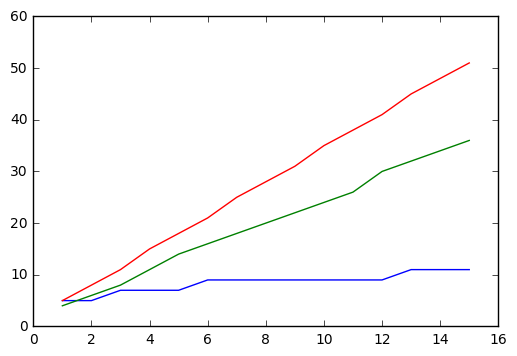

In [15]:
plt.plot(logeps, iterations_newton, color='blue')
plt.plot(logeps, iterations_dichotomie, color='red')
plt.plot(logeps, iterations_point_fixe, color='green')

## 2 - Newton alterné

<div class="alert alert-block alert-warning">
Dans cette partie, nous allons utiliser une méthode de Newton alternée afin de trouver les coefficients de la droite de régression par la méthode des moindres carrés.
</div>

<div class="alert alert-block alert-info">
Exécuter la boite ci-dessous pour charger les données de ventes en fonction de la publicité.
</div>

In [16]:
data_pub = pd.read_csv('advertising.csv')
data_pub.head() # visualisation du contenu

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


<div class="alert alert-block alert-info">
Exécuter la boite ci-dessous pour définir les variables <code>tv</code> et <code>ventes</code>.
</div>

In [17]:
tv = data_pub['TV']
ventes = data_pub['Sales']

<div class="alert alert-block alert-info">
Exécuter la boite ci-dessous qui reprend le travail d'un TME précédent pour visualiser la droite de régression de <code>ventes</code> en fonction de <code>tv</code>.
</div>

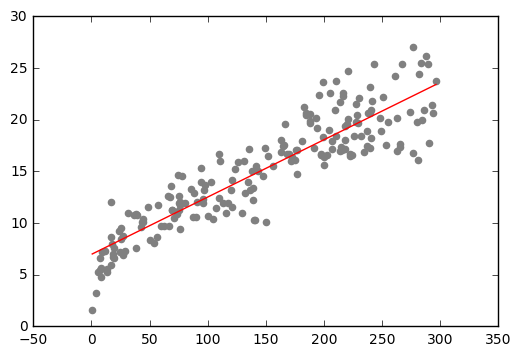

In [18]:
def cov(x, y):
    return np.mean((x - np.mean(x)) * (y - np.mean(y)))

def regression_mc(x, y):
    b = cov(x, y) / np.std(x) ** 2
    a = np.mean(y) - b * np.mean(x)
    return a, b

def plot_regression(x, y):
    a, b = regression_mc(x, y)
    _ = plt.scatter(x, y, color = 'gray')
    _ = plt.plot([np.min(x), np.max(x)], [a + b * np.min(x), a + b * np.max(x)], color = 'red')
    return None

plot_regression(tv, ventes)

<div class="alert alert-block alert-info">
Q2.1 - Calculer les coefficients de la droite de régression $y \simeq a + bx$ de <code>ventes</code> en fonction de <code>tv</code> par la méthode des moindres carrés.
</div>

In [19]:
regression_mc(tv, ventes)

(6.974821488229903, 0.05546477046955881)

<div class="alert alert-block alert-info">
    Q2.2 - Définir la fonction <code>cout</code> qui étant donné deux coefficients <code>a</code> et <code>b</code> et deux séries de données <code>x</code> et <code>y</code>, renvoie le coût quadratique $C$ (celui des moindres carrés) : $$C(a, b, x, y) = \sum_{i = 1}^{n} |a + b.x_i - y_i|^2.$$
Calculer le coût quadratique pour les coefficients trouvés précédemment.
</div>

In [20]:
def cout(a, b, x, y):
    return np.sum((np.abs(a+b*x-y)**2))

cout(6.974821488229903, 0.05546477046955881, tv, ventes)

1043.5487795590257

<div class="alert alert-block alert-info">
Q2.3 - Compléter les fonctions ci-dessous pour qu'elle calculent :
<ul>
    <li><code>dcout_da(a, b, x, y)</code> pour $\partial_a C(a, b, x, y)$</li>
    <li><code>dcout_db(a, b, x, y)</code> pour $\partial_b C(a, b, x, y)$</li>
    <li><code>d2cout_da(a, b, x, y)</code> pour $\partial^2_a C(a, b, x, y)$</li>
    <li><code>d2cout_db(a, b, x, y)</code> pour $\partial^2_b C(a, b, x, y)$</li>
</ul>
</div>

In [48]:
def dcout_da(a, b, x, y):
    return np.sum(2*(a+b*x-y))

def dcout_db(a, b, x, y):
    return np.sum(2*x*(a+b*x-y))

def d2cout_da2(a, b, x, y):
    return 2*len(x)

def d2cout_db2(a, b, x, y):
    return (2*np.dot(x,x))

<div class="alert alert-block alert-info">
Q2.4 - Compléter la fonction <code>newton_alterne</code> ci-dessous qui prend en paramètres les dérivées première <code>dfa</code> et seconde <code>d2fa</code> d'une fonction de coût $f$ par rapport à $a$, les dérivées première <code>dfb</code> et seconde <code>d2fb</code> de la même fonction de coût par rapport à $b$, les coordonnées du point initial <code>a0</code>, <code>b0</code>, les données <code>x</code> et <code>y</code> et une précision <code>epsilon</code>, et qui calcule un couple $(a, b)$ qui minimise la fonction de coût.
</div>

(6.974821488229894, 0.05546477046955884)

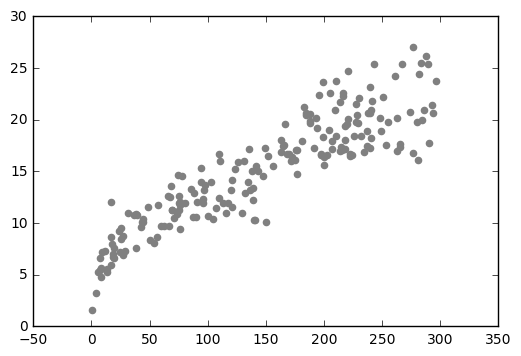

In [50]:
def newton_alterne(dfa, d2fa, dfb, d2fb, a0, b0, x, y, eps):
    _ = plt.scatter(x, y, color = 'gray')
    a = a0
    b = b0
    aprec = a + 2 * eps
    bprec = b + 2 * eps
    while max(np.abs(aprec-a), np.abs(bprec-b))> eps: 
        aprec=a
        bprec=b
        a = a - (dfa(a,b,x,y)/d2fa(a,b,x,y))
        b = b - (dfb(a,b,x,y)/d2fb(a,b,x,y))
    return a, b

newton_alterne(dcout_da, d2cout_da2, dcout_db, d2cout_db2, 0, 0, tv, ventes, 1e-16)

## 3 - Descente de gradient

<div class="alert alert-block alert-info">
Q3.1 - Définir la fonction <code>descente_gradient</code> qui étant donné un gradient à deux dimensions <code>dfa</code>, <code>dfb</code>, un point de départ <code>ua0</code>, <code>ub0</code>, des données <code>x</code>, <code>y</code>, un pas <code
</div>

In [58]:
def descente_gradient(dfa, dfb, ua0, ub0, x, y, gamma, eps):
    ua = ua0
    ub = ub0
    uaprec = ua + 2 * eps
    ubprec = ub + 2 * eps
    while max(np.abs(uaprec-ua), np.abs(ubprec-ub))> eps:
        uaprec=ua
        ubprec=ub
        ua = ua - gamma*np.array(dfa(ua, ub, x, y), dfb(ua, ub, x, y))
        ub = ub - gamma*np.array(dfa(ua, ub, x, y), dfb(ua, ub, x, y))
    return ua, ub

In [62]:
descente_gradient(dcout_da,dcout_db, 0, 0, tv, ventes, 0.00001, 1e-16)

(0.10261143229907187, 0.10220098656987553)